Imports y configuraciones de ambiente

In [21]:
import torch
import torch.optim as optim
import numpy as np
import random
import numpy as np
import gymnasium

Checkeo de devices

In [22]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Running on {DEVICE}")
print("Cuda Available:", torch.cuda.is_available())

Running on cuda:0
Cuda Available: True


Setting de seeds

In [23]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

Validacion del ambiente

In [24]:
ENV_NAME = "CartPole-v1"

env = gymnasium.make(ENV_NAME, render_mode="rgb_array")

print("Actions #",env.action_space)
print(env.observation_space.shape)
env.reset()
next_state, reward, terminated, truncated, info = env.step(action=0)

print(f"{next_state.shape},\n {reward},\n {terminated},\n {info}")

Actions # Discrete(2)
(4,)
(4,),
 1.0,
 False,
 {}


In [25]:
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = .999#1000
TAU = 0.005
LR = 1e-4
MEMORY_SIZE = 10000

In [26]:
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

In [27]:
from agent import Agent

env = gymnasium.make(ENV_NAME)
agent = Agent(env, DEVICE, n_observations, n_actions, EPS_START, 
              EPS_END, EPS_DECAY, GAMMA, BATCH_SIZE, MEMORY_SIZE)

In [28]:
optimizer = optim.AdamW(agent.policy_net.parameters(), lr=LR, amsgrad=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


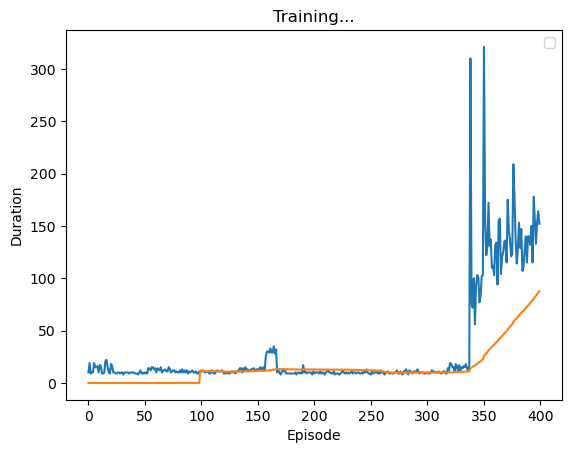

<Figure size 640x480 with 0 Axes>

In [29]:
episode_durations = agent.train(num_episodes= 500, TAU=TAU, optimizer=optimizer)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


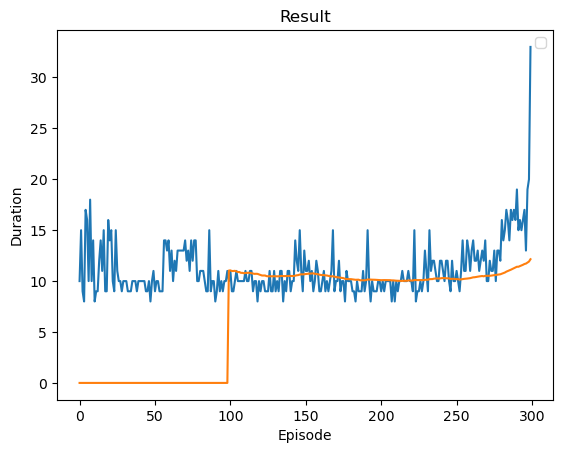

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
agent.plot_durations(episode_durations, True)